# Analysis of SIF

In [10]:
from get_atomic_props import AtomPropsDist
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import pearsonr

# Pearson correlation of mean EN and mean polarizability

xyz_dir = '/home/alex/Pt_NMR/data/structures/total/'
xyz_file_list = sorted(os.listdir(xyz_dir), key=lambda x: int(x.replace('st_', '').split('.')[0]))

shifts = pd.read_csv('/home/alex/Pt_NMR/data/labels/final_data_corrected.csv')['Experimental']

mean_polarizability_list = []
mean_EN_list = []

for file in xyz_file_list:
    xyz_path = os.path.join(xyz_dir, file)
    apd = AtomPropsDist(central_atom='Pt', xyz_path=xyz_path, xyz_base='st_')

    mean_EN = apd.get_atomic_properties(format='xyz', target='pauling_EN', mode='neighbors')[1]
    mean_polarizability = apd.get_atomic_properties(format='xyz', target='polarizability', mode='neighbors')[1]

    mean_EN_list.append(mean_EN)
    mean_polarizability_list.append(mean_polarizability)


plt.scatter(mean_EN_list, mean_polarizability_list)

plt.xlabel('Mean Electronegativity')
plt.ylabel('Mean Polarizability')

r_val = pearsonr(mean_EN_list, mean_polarizability_list)[0]
print(f'Pearson correlation between features: {r_val}')

plt.grid()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/alex/Pt_NMR/data/labels/final_data_corrected.csv'

In [14]:
xyz_dir = '/home/alex/Pt_NMR/data/structures/total/'
xyz_file_list = sorted(os.listdir(xyz_dir), key=lambda x: int(x.replace('st_', '').split('.')[0]))

shifts_sorted = pd.read_csv('/home/alex/Pt_NMR/data/labels/total_set_clean_120525.csv').sort_values(by='Index')['Experimental']


coord_n_list = []
mean_EN_list = []

for file in xyz_file_list:
    xyz_path = os.path.join(xyz_dir, file)
    apd = AtomPropsDist(central_atom='Pt', xyz_path=xyz_path, xyz_base='st_')

    mean_EN = apd.get_atomic_properties(format='xyz', target='atomic_radius', mode='neighbors')[1]
    valency = apd.get_atomic_properties(format='xyz', target='atomic_radius', mode='neighbors')[2]

    mean_EN_list.append(mean_EN)
    coord_n_list.append(valency)

mean_EN_tetra = []
mean_EN_hexa = []

shift_tetra = []
shift_hexa = []

for mean_EN, val, shift in zip(mean_EN_list, coord_n_list, shifts_sorted):

    if val == 4:
        mean_EN_tetra.append(mean_EN)
        shift_tetra.append(shift)
    elif val == 5:
        mean_EN_tetra.append(mean_EN)
        shift_tetra.append(shift)
    else:
        mean_EN_hexa.append(mean_EN)
        shift_hexa.append(shift)

print(f'Number of square-planar complexes: {len(mean_EN_tetra)}')
print(f'NUmber of octahedral complexes: {len(mean_EN_hexa)}')

pearson_tetra = pearsonr(mean_EN_tetra, shift_tetra)
pearson_hexa = pearsonr(mean_EN_hexa, shift_hexa)

print(f'Pearson correlation of square planar complexes: {pearson_tetra}')
print(f'Pearson correlation of octahedral complexes: {pearson_hexa}')

Number of square-planar complexes: 248
NUmber of octahedral complexes: 44
Pearson correlation of square planar complexes: PearsonRResult(statistic=-0.7370146325107916, pvalue=9.649551407210185e-44)
Pearson correlation of octahedral complexes: PearsonRResult(statistic=-0.9982140714644439, pvalue=4.910202707584692e-53)


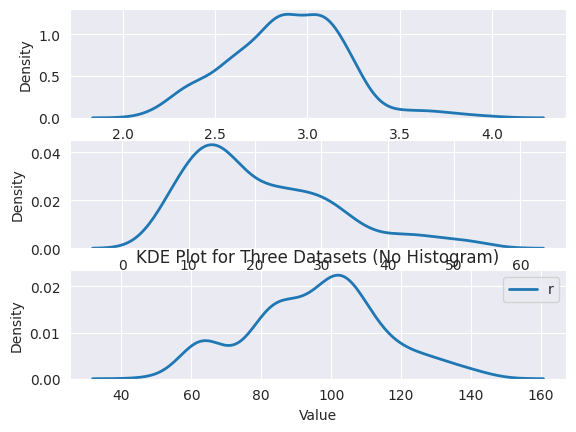

In [3]:
# Distribution of SIF covariates (for illustrating effects of per-feature scaling)

from get_atomic_props import AtomPropsDist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

xyz_dir = '/home/alex/Pt_NMR/data/structures/total/'
xyz_file_list = sorted(os.listdir(xyz_dir), key=lambda x: int(x.replace('st_', '').split('.')[0]))

shifts = pd.read_csv('/home/alex/Pt_NMR/data/labels/total_set_clean_120525.csv')['Experimental']

nuclear_charge_list = []
radius_list = []
mean_EN_list = []

for file in xyz_file_list:
    xyz_path = os.path.join(xyz_dir, file)
    apd = AtomPropsDist(central_atom='Pt', xyz_path=xyz_path, xyz_base='st_')

    mean_EN = apd.get_atomic_properties(format='xyz', target='pauling_EN', mode='neighbors')[1]
    nuclear_charge = apd.get_atomic_properties(format='xyz', target='nuclear_charge', mode='neighbors')[1]
    radius = apd.get_atomic_properties(format='xyz', target='atomic_radius', mode='neighbors')[1]
    mean_EN_list.append(mean_EN)
    nuclear_charge_list.append(nuclear_charge)
    radius_list.append(radius)

# Create the KDE plot
fig, axes = plt.subplots(3, 2)

sns.kdeplot(mean_EN_list, label='EN', linewidth=2, ax=axes[0][0])
sns.kdeplot(nuclear_charge_list, label='Z', linewidth=2, ax=axes[1][0])
sns.kdeplot(radius_list, label='r', linewidth=2, ax=axes[2][0])

# Add labels and legend
plt.title('KDE Plot for Three Datasets (No Histogram)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

# TODO: Show plot with unscaled features


# Analysis of APE-RF

In [ ]:
# Smooth vs. non-smooth cutoff

import numpy as np
from generate_descriptors import generate_descriptors

path = '/home/alex/Pt_NMR/data/representations/APE_RF/train/'
xyz_path = '/home/alex/Pt_NMR/data/structures/train_split/'

gen = generate_descriptors([3.0, 1000], descriptor_path=path, central_atom='Pt', xyz_path=xyz_path, xyz_base='st_', normalize=False)

apes = gen.get_APE_RF(format='xyz', mode='all', smooth_cutoff=False, path_index=0)
apes_2 = gen.get_APE_RF(format='xyz', mode='all', smooth_cutoff=True, path_index=0)

fig, ax = plt.subplots(1,2)

x = np.linspace(0.0, 3.0, 1000)
y1 = apes[44]
y2 = apes[60]
y3 = apes[180]

y1_1 = apes_2[44]
y2_1 = apes_2[60]
y3_1 = apes_2[180]

ax[0].plot(x, y1, label='1')
ax[0].plot(x, y2, label='2')
ax[0].plot(x, y3, label='3')

ax[0].grid()

ax[0].set_xlabel('Distance from Pt [$\AA$]')
ax[0].set_ylabel('$\Phi(r)$', fontsize=18)

ax[1].plot(x, y1_1, label='1')
ax[1].plot(x, y2_1, label='2')
ax[1].plot(x, y3_1, label='3')

ax[1].grid()

ax[1].set_xlabel('Distance from Pt [$\AA$]')
ax[1].set_ylabel('$\Phi(r)$', fontsize=18)
#plt.savefig('/home/alex/APE_RF_smooth_example_270225.png', dpi=400, bbox_inches='tight')

In [ ]:
# Plotting complexes with bondlengths larger than 2.5 A

from generate_descriptors import generate_descriptors

xyz_dir = '/home/alex/Pt_NMR/data/structures/total/'
names = pd.read_csv('/home/alex/Pt_NMR/data/labels/final_data_corrected.csv')['Name']


gen = generate_descriptors(descriptor_params=[3.0, 500], descriptor_path='../data/representations/APE_RF/',
                           central_atom='Pt', xyz_path=xyz_dir, xyz_base='st_', normalize=False)

apes = gen.get_APE_RF(format='xyz', mode='all', smooth_cutoff=False)

x = np.linspace(0.0, 3.0, 500)

plt.plot(x, apes[269], label='$[PtCl_{6}]^{2-}$')
plt.plot(x, apes[296], label='$[PtI_{6}]^{2-}$')

plt.grid()
plt.legend()

plt.xlabel('Distance from Pt [$\AA$]')
plt.ylabel('$\Phi(r)$', fontsize=16)

print(names[269])
print(names[296])

plt.show()

# Grid search analysis

In [7]:
"""
Looking for lowest MAE for given kernel degree in grid search output
"""

import re

# File path
#file_path = "/home/alex/Desktop/APE_RF_140525.log"
file_path = '/home/alex/Desktop/SOAP_140525.log'
# Dictionary to store the lowest MAE and corresponding hyperparameters for each degree
degree_best_params = {}

# Define regex pattern to match lines with hyperparameter combinations and MAE values
pattern = re.compile(r"Errors of hyperparameter combination: \(([^)]+)\) ([\d\.]+)")

# Read the file and extract relevant data
with open(file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            params = match.group(1).split(", ")  # Extract parameters as a list
            mae = float(match.group(2))  # Extract MAE

            # Extract degree (4th parameter in the tuple)
            degree = float(params[0])

            # Store the lowest MAE and corresponding hyperparameters for each degree
            if degree not in degree_best_params or mae < degree_best_params[degree]["MAE"]:
                degree_best_params[degree] = {
                    "MAE": mae,
                    "Hyperparameters": tuple(params)  # Store as tuple for readability
                }

# Display results
for degree, data in degree_best_params.items():
    print(f"Degree: {degree}, Lowest MAE: {data['MAE']}, Hyperparameters: {data['Hyperparameters']}")


Degree: 2.0, Lowest MAE: 121.60933203280756, Hyperparameters: ('2.0', '3', '5', '0.01', '2', '0.0009165714093831292')
Degree: 2.5, Lowest MAE: 122.46460723166672, Hyperparameters: ('2.5', '2', '3', '0.01', '2', '0.0008257907678417749')
Degree: 3.0, Lowest MAE: 126.3267263900457, Hyperparameters: ('3.0', '1', '7', '0.01', '3', '0.0032408022340294565')
Degree: 3.5, Lowest MAE: 126.3267271854329, Hyperparameters: ('3.5', '1', '4', '0.01', '3', '0.0032408022603259627')
Degree: 4.0, Lowest MAE: 126.32672655480985, Hyperparameters: ('4.0', '1', '5', '0.01', '3', '0.0032408022333395535')
Degree: 4.5, Lowest MAE: 126.32672618303931, Hyperparameters: ('4.5', '1', '4', '0.01', '3', '0.0032408022603483883')
Degree: 5.0, Lowest MAE: 126.3267268716889, Hyperparameters: ('5.0', '1', '5', '0.01', '3', '0.0032408022333508713')


# SIF analysis

In [ ]:
"""
Parallel coordinate plot of SIF (maybe for SI)
"""

import pandas as pd
from pandas.plotting import parallel_coordinates
from generate_descriptors import generate_descriptors
from matplotlib import cm, colors
from sklearn.preprocessing import StandardScaler

xyz_dir = '/home/alex/Pt_NMR/data/structures/total/'
gen = generate_descriptors(descriptor_params=['EN', 'alpha', 'val', 'qmol'], descriptor_path='../data/representations/SIF/',
                           central_atom='Pt', xyz_path=xyz_dir, xyz_base='st_', normalize=False)
features = gen.get_SIF()[0]
cluster_labels = pd.read_csv('../data/labels/final_data_corrected_dbscan_pca.csv')['dbscan_pca_1']

df = pd.DataFrame(features, columns=["Mean EN", "Mean \n Polarizability", "Valency", "Molecular \n Charge"])
df["Cluster"] = cluster_labels.astype(str)

scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

unique_clusters = sorted(set(cluster_labels))
norm_labels = np.array([unique_clusters.index(c) for c in cluster_labels])

colormap = colors.ListedColormap(cm.plasma(np.linspace(0, 1, len(unique_clusters))))

plt.figure(figsize=(10, 6))
parallel_coordinates(df, class_column="Cluster", colormap=colormap, alpha=0.6)

plt.yticks([])
plt.show()


# Dataset analysis

{'As': 17, 'Si': 12, 'F': 17, 'N': 141, 'Se': 14, 'O': 35, 'I': 58, 'Te': 8, 'Sn': 2, 'Pt': 0, 'P': 44, 'Br': 71, 'Cl': 119, 'C': 8, 'Ge': 2, 'H': 1, 'S': 73, 'Sb': 8}
[17, 12, 17, 141, 14, 35, 58, 8, 2, 0, 44, 71, 119, 8, 2, 1, 73, 8]


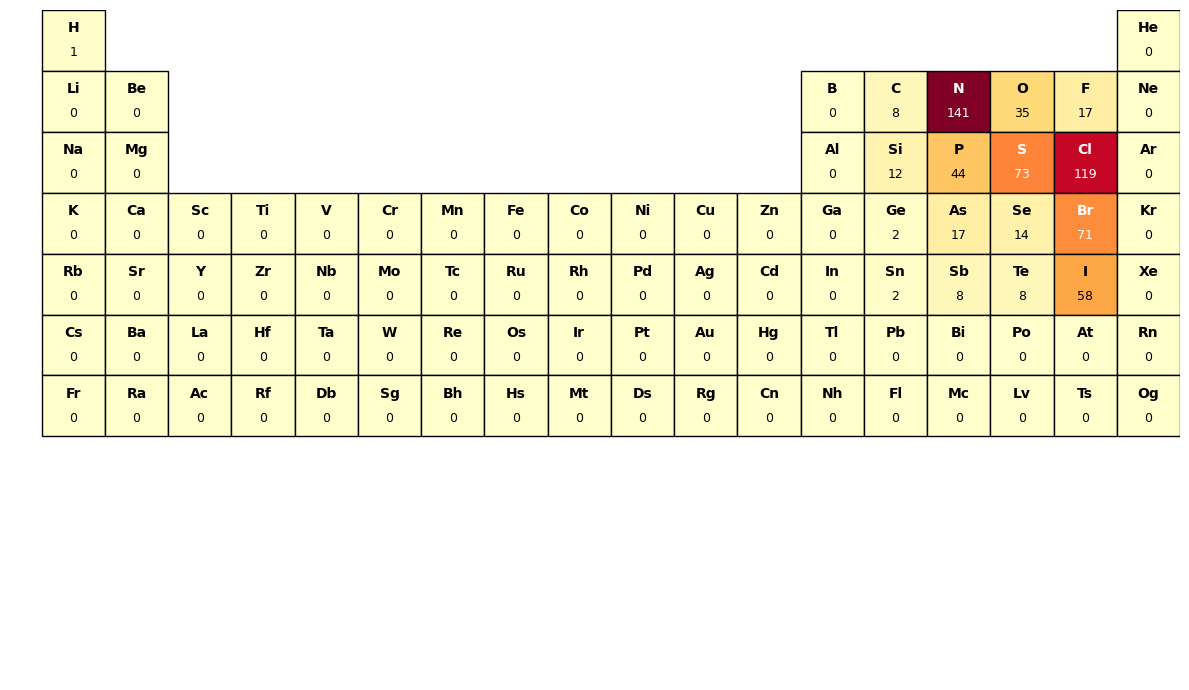

In [3]:
import matplotlib.pyplot as plt
from generate_descriptors import  generate_descriptors
from get_atomic_props import AtomPropsDist
import os


xyz_dir = '/home/alex/Pt_NMR/data/structures/total/'
gen = generate_descriptors(descriptor_params=['EN', 'alpha', 'val', 'qmol'], descriptor_path='../data/representations/SIF/',
                           central_atom='Pt', xyz_path=xyz_dir, xyz_base='st_', normalize=False)

elements = gen.get_total_species()
xyz_filenames = sorted(os.listdir(xyz_dir), key=lambda x: int(x.replace('st_', '').split('.')[0]))
neighbor_list = []

for xyz_filename in xyz_filenames:
    xyz_path = os.path.join(xyz_dir, xyz_filename)
    apd = AtomPropsDist(central_atom='Pt', xyz_base='st_',
                                    xyz_path=os.path.join(xyz_dir, xyz_filename))

    neighbors = apd.get_adjacent_atoms_xyz()[0]
    neighbor_list.append(neighbors)

element_counts = dict.fromkeys(elements, [])

count_list = []
for element in elements:
    count = 0

    for neighbors in neighbor_list:
        if element in set(neighbors):
            count += 1


    count_list.append(count)

for element, count in zip(elements, count_list):
    element_counts[element] = count

print(element_counts)
print(count_list)


periodic_table = {
    'H': (0, 0), 'He': (0, 17),
    'Li': (1, 0), 'Be': (1, 1), 'B': (1, 12), 'C': (1, 13), 'N': (1, 14), 'O': (1, 15), 'F': (1, 16), 'Ne': (1, 17),
    'Na': (2, 0), 'Mg': (2, 1), 'Al': (2, 12), 'Si': (2, 13), 'P': (2, 14), 'S': (2, 15), 'Cl': (2, 16), 'Ar': (2, 17),
    'K': (3, 0), 'Ca': (3, 1), 'Sc': (3, 2), 'Ti': (3, 3), 'V': (3, 4), 'Cr': (3, 5), 'Mn': (3, 6), 'Fe': (3, 7),
    'Co': (3, 8), 'Ni': (3, 9), 'Cu': (3, 10), 'Zn': (3, 11), 'Ga': (3, 12), 'Ge': (3, 13), 'As': (3, 14), 'Se': (3, 15),
    'Br': (3, 16), 'Kr': (3, 17),

    'Rb': (4, 0), 'Sr': (4, 1), 'Y': (4, 2), 'Zr': (4, 3), 'Nb': (4, 4), 'Mo': (4, 5), 'Tc': (4, 6), 'Ru': (4, 7),
    'Rh': (4, 8), 'Pd': (4, 9), 'Ag': (4, 10), 'Cd': (4, 11), 'In': (4, 12), 'Sn': (4, 13), 'Sb': (4, 14), 'Te': (4, 15),
    'I': (4, 16), 'Xe': (4, 17),

    'Cs': (5, 0), 'Ba': (5, 1), 'La': (5, 2), 'Hf': (5, 3), 'Ta': (5, 4), 'W': (5, 5), 'Re': (5, 6), 'Os': (5, 7),
    'Ir': (5, 8), 'Pt': (5, 9), 'Au': (5, 10), 'Hg': (5, 11), 'Tl': (5, 12), 'Pb': (5, 13), 'Bi': (5, 14), 'Po': (5, 15),
    'At': (5, 16), 'Rn': (5, 17),

    'Fr': (6, 0), 'Ra': (6, 1), 'Ac': (6, 2), 'Rf': (6, 3), 'Db': (6, 4), 'Sg': (6, 5), 'Bh': (6, 6), 'Hs': (6, 7),
    'Mt': (6, 8), 'Ds': (6, 9), 'Rg': (6, 10), 'Cn': (6, 11), 'Nh': (6, 12), 'Fl': (6, 13), 'Mc': (6, 14), 'Lv': (6, 15),
    'Ts': (6, 16), 'Og': (6, 17),
}


max_count = max(element_counts.values()) if element_counts else 1
colors = {elem: element_counts.get(elem, 0) / max_count for elem in periodic_table}

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xticks([])
ax.set_yticks([])

for elem, (row, col) in periodic_table.items():
    count = element_counts.get(elem, 0)
    color = plt.cm.YlOrRd(colors[elem])
    ax.add_patch(plt.Rectangle((col, -row), 1, 1, color=color, ec="black"))

    ax.text(col + 0.5, -row + 0.7, elem, ha="center", va="center", fontsize=10,
            fontweight="bold", color="white" if colors[elem] > 0.5 else "black")

    ax.text(col + 0.5, -row + 0.3, str(count), ha="center", va="center", fontsize=9,
            color="white" if colors[elem] > 0.5 else "black")

ax.set_frame_on(False)


plt.xlim(-0.5, 18)
plt.ylim(-10, 1)

plt.tight_layout()
plt.savefig('../paper/figs/pse_samples_total.png', dpi=400, bbox_inches='tight')

plt.show()



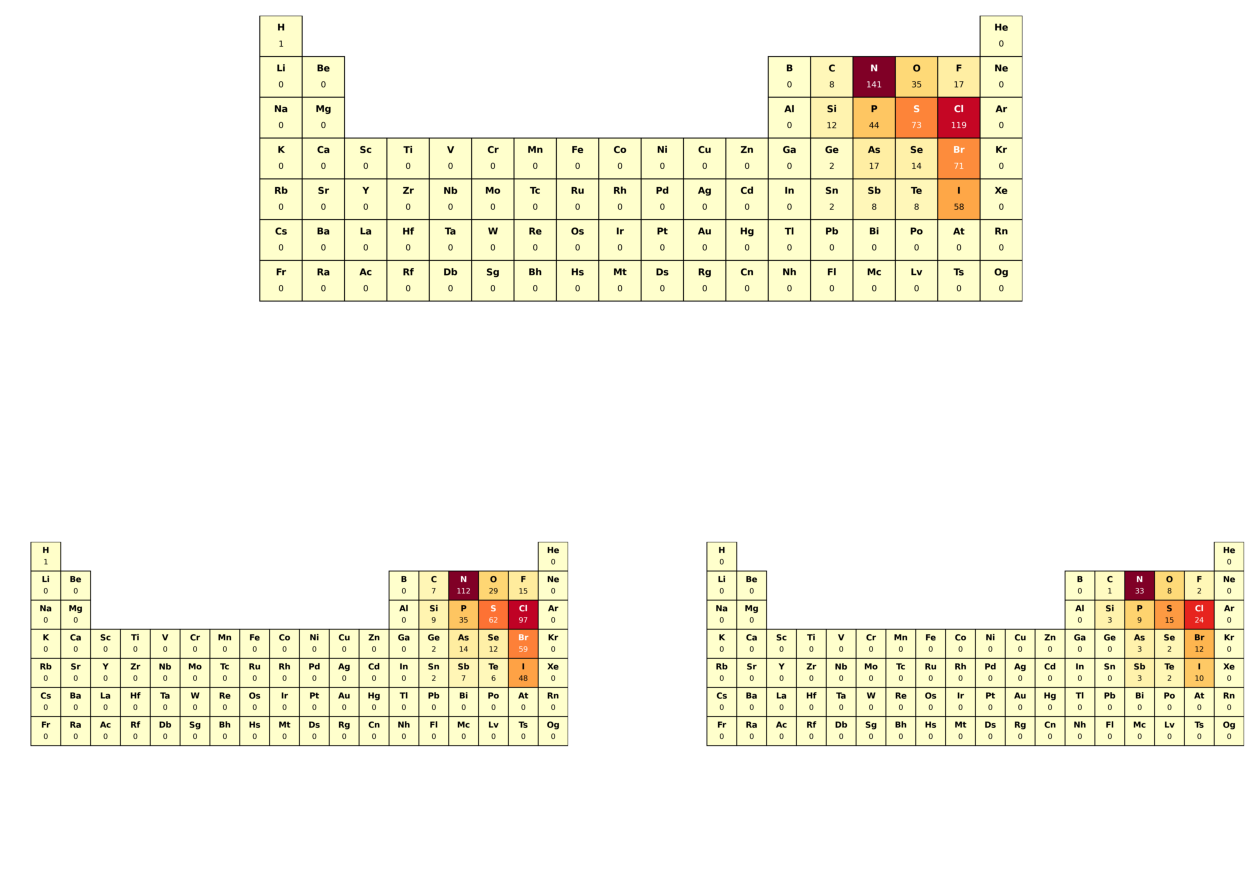

In [1]:
import matplotlib.pyplot as plt

# Species present in dataset PSE (maybe for SI)

# Load images
pse_total = plt.imread('../paper/figs/pse_samples_total.png')
pse_train = plt.imread('../paper/figs/pse_samples_train.png')
pse_test = plt.imread('../paper/figs/pse_samples_test.png')

# Create a figure with a custom grid
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])  # Reduce gap between rows

# Create the first (centered) subplot
ax1 = fig.add_subplot(gs[0, :])  # First row spans both columns
ax1.imshow(pse_total)
ax1.axis('off')  # Remove ticks and labels

# Create the second row subplots
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

ax2.imshow(pse_train)
ax3.imshow(pse_test)

ax2.axis('off')
ax3.axis('off')

# Adjust spacing
plt.subplots_adjust(hspace=0) # Reduce vertical spacing

# Save and show
plt.savefig('../paper/figs/pse_fig.pdf', bbox_inches='tight')
plt.show()


/tmp/ipykernel_19586/3150037719.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')


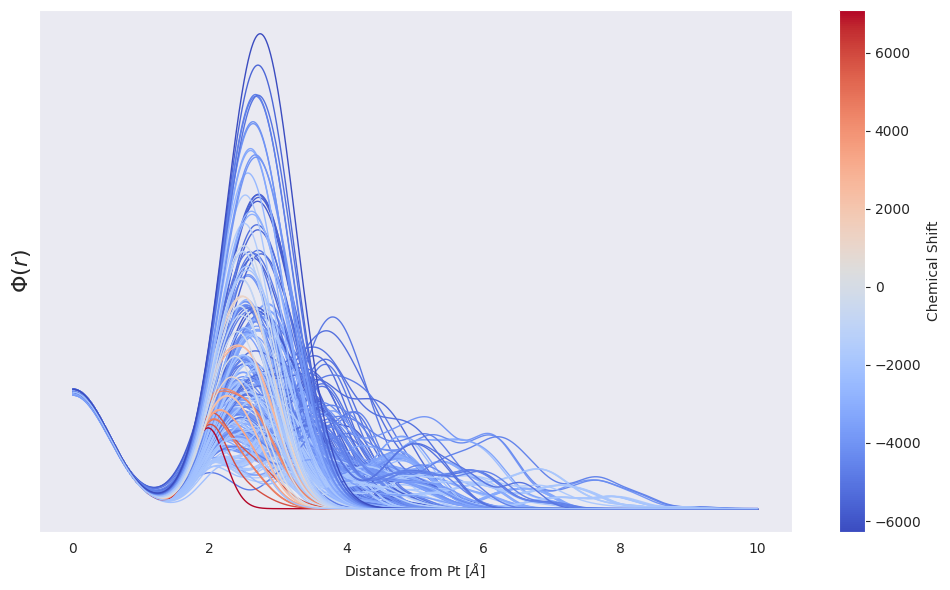

In [4]:
# Plot APE-RFs for all structures

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import pandas as pd
from generate_descriptors import generate_descriptors

# Paths
xyz_dir = '/home/alex/Pt_NMR/data/structures/total/'
shifts = pd.read_csv('/home/alex/Pt_NMR/data/labels/total_set_clean_120525.csv')['Experimental']

# Descriptor generation
gen = generate_descriptors(
    descriptor_params=[10.0, 8000],
    descriptor_path='../data/representations/APE_RF/',
    central_atom='Pt',
    xyz_path=xyz_dir,
    xyz_base='st_',
    normalize=True
)

apes = gen.get_APE_RF(format='xyz', mode='all', smooth_cutoff=False)

# X-axis
x = np.linspace(0.0, 10.0, 8000)

# Normalize the experimental values for color mapping
norm = Normalize(vmin=shifts.min(), vmax=shifts.max())
cmap = cm.get_cmap('coolwarm')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each curve with color based on experimental shift
for ape, shift in zip(apes, shifts):
    ax.plot(x, ape, color=cmap(norm(shift)), linewidth=1)

# Create ScalarMappable and attach colorbar to the figure's Axes
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Needed for the colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Chemical Shift')

# Formatting
ax.grid()
ax.set_xlabel('Distance from Pt [$\AA$]')
ax.set_ylabel('$\Phi(r)$', fontsize=16)
ax.set_yticks([])
fig.tight_layout()
# fig.savefig('../paper/figs/fig_4.pdf')
plt.show()


# Clustering analysis

In [ ]:
# Optimizing DBSCAN using silhouette score (SIF samples used for clustering)

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from generate_descriptors import generate_descriptors
import numpy as np
import pandas as pd

target_list = ['pauling_EN', 'polarizability', 'valency', 'qmol']

descriptor_path = "/home/alex/Pt_NMR/data/representations/SIF/"
xyz_path = "/home/alex/Pt_NMR/data/structures/total/"

gen = generate_descriptors(descriptor_params=target_list,
                           descriptor_path=descriptor_path, central_atom='Pt', xyz_path=xyz_path,
                           xyz_base='st_', normalize=False)

X_data = gen.get_SIF(target_list=target_list)[0]

df = pd.read_csv('/home/alex/Desktop/SIF_df.csv')

#df_scaled = df.copy()
#scaler = StandardScaler()
#df_scaled[['A', 'B']] = scaler.fit_transform(df[['A', 'B']])

# Optionally normalize C (coordination number) to [0, 1]
#df_scaled['C'] = df['C'] / df['C'].max()

# Normalize charge D to [-1, 1] based on max absolute value
#df_scaled['D'] = df['D'] / df['D'].abs().max()

eps_grid = np.arange(0.1, 0.8, 0.01)
min_samples_grid = np.arange(5, 15, 1)

cluster_score_list = []
param_list = []
num_list = []

for eps in eps_grid:
    for min_samples in min_samples_grid:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X_data)
        clusters = clustering.labels_
        score = silhouette_score(X_data, clusters)
        cluster_score_list.append(score)
        param_list.append([eps, min_samples])
        unique_labels, counts = np.unique(clusters, return_counts=True)
        n_clusters = len(unique_labels)
        num_list.append(n_clusters)

opt_result = max(zip(param_list, cluster_score_list, num_list), key=lambda x: x[1])
print(opt_result)



In [ ]:
# Elbow plot for clustering

from sklearn.neighbors import NearestNeighbors
from generate_descriptors import generate_descriptors
import numpy as np
import matplotlib.pyplot as plt

target_list = ['pauling_EN', 'polarizability', 'valency', 'qmol']

descriptor_path = "/home/alex/Pt_NMR/data/representations/SIF/"
xyz_path = "/home/alex/Pt_NMR/data/structures/total/"

gen = generate_descriptors(descriptor_params=target_list,
                           descriptor_path=descriptor_path, central_atom='Pt', xyz_path=xyz_path,
                           xyz_base='st_', normalize=False)

X_data = gen.get_SIF(target_list=target_list)[0]

neighbors = NearestNeighbors(n_neighbors=5)  # 5 = min_samples
neighbors_fit = neighbors.fit(X_data)
distances, indices = neighbors_fit.kneighbors(X_data)
distances = np.sort(distances[:, 4], axis=0)  # 4 because index starts at 0
plt.plot(distances)
plt.ylabel("k-distance")
plt.xlabel("Points sorted by distance")
plt.show()

print(distances)

# Uncertainty analysis


 Optimized noise (on whole train set): 0.0009165705491561432
Log marginal likelihood: 190.46660784703005 

Outliers (8):
------------
Compound Name: cis-[Pt(AsMe3)Cl2], Observed: -4291, Predicted: -4054.1060366852944, Residual: 236.89396331470562
Compound Name: cis-[Pt(TeMe2)Cl2], Observed: -4369, Predicted: -4069.2668691624685, Residual: 299.73313083753146
Compound Name: trans-[Pt(SMe2)I2], Observed: -5789, Predicted: -4564.670872184166, Residual: 1224.329127815834
Compound Name: trans-[Pt(SCN)2(PBun3)2], Observed: -4526, Predicted: -4281.423771455813, Residual: 244.57622854418696
Compound Name: [Pt(PF3)Cl3]-, Observed: -3626, Predicted: -3101.4966744183957, Residual: 524.5033255816043
Compound Name: cis-[Pt(AsEt3)2Cl2], Observed: -4363, Predicted: -4016.218837327796, Residual: 346.7811626722041
Compound Name: trans-Pt(SCN)2(SeMe2)2, Observed: -4963, Predicted: -4605.0668577712, Residual: 357.9331422287996
Maximum outlier deviation: 1224.329127815834
Mean outlier deviation: 462.10715

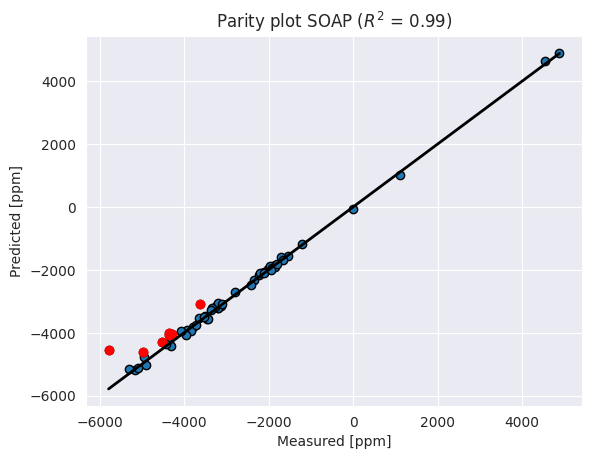

Errors on holdout test set (Backend: sklearn): 
-----------------------------------------
MAE: 113.76861035517297 [ppm]
RMSE: 208.81264798774322 [ppm]
-----------------------------------------
[ 92.76101701  95.69559844  89.10658042  91.5798774  104.73344169
  92.15837934 235.78306479 100.94851721 193.89421717  97.34598615
  90.50006363  97.02313638  97.60436213  98.33397224 425.81461015
 118.14118571 107.48584002 455.40381235 387.94909244 416.9569595
 166.94268101 202.02060431  93.87120275 109.9673335   94.4923513
 176.41334458 195.88594206 114.25533012 165.50639051 126.52469789
 310.41623628 203.80835563 117.27369622 185.33713077 196.1357849
 114.85757407 234.89987919 102.49182524 108.09576189  85.2507626
  88.3463191  103.48165404 214.94390534 454.0952167  414.12069793
 170.97485381  99.32228681 137.16402037 127.33687481 152.98221186
 128.84002789 112.61916632 342.23368996 184.08479509 147.60849143
 161.617086   115.62985612  94.76003455  96.99985649]
168.48860412874203


In [5]:
# Uncertainty analysis SOAP

import numpy as np
from NMR_predict import GPR_NMR

## Define path to xyz files and path to SOAP files

XYZ_directory = ['/home/alex/Pt_NMR/data/structures/train_split/',
                 '/home/alex/Pt_NMR/data/structures/test_split/']

SOAP_directory = ['/home/alex/Pt_NMR/data/representations/SOAP/train/',
                  '/home/alex/Pt_NMR/data/representations/SOAP/test/']

target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_train.csv',
               '/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_test.csv']

# Define list of SOAP params [r_cut, n_max, l_max]
params = [2.0, 3, 5]

# Create instance of GPR_NMR class
pt_gpr = GPR_NMR(descriptor_path=SOAP_directory, descriptor_type='SOAP',
                 descriptor_params=params, central_atom='Pt', mode ='write',
                 xyz_path=XYZ_directory, xyz_base='st_', target_path=target_path)


# Use predict function for GPR and obtaining CV prediction errors
errors_std = pt_gpr.GPR_train(kernel_degree=2, noise=0.01, noise_estim=True, lc=False)
uncertainties = pt_gpr.GPR_test(kernel_degree=2, noise=0.01, noise_estim=True, parity_plot=True, ecp=False)[3]

print(uncertainties)
print(np.mean(uncertainties))

np.savetxt('/home/alex/Desktop/SOAP_uncertainties.txt', uncertainties)




 Optimized noise (on whole train set): 0.004817196126972566
Log marginal likelihood: -26.657195160204566 



/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as 

(145.40665957055032, 20.63161779359782, 238.226987493189, 84.11886394516823, 0.004817196126972566)
Outliers (8):
------------
Compound Name: cis-[Pt(TeMe2)Cl2], Observed: -4369, Predicted: -4124.545115360845, Residual: 244.45488463915535
Compound Name: trans-[Pt(AsMe3)Cl2], Observed: -3780, Predicted: -4139.763689034247, Residual: -359.76368903424736
Compound Name: trans-[Pt(SMe2)I2], Observed: -5789, Predicted: -4513.146555836315, Residual: 1275.8534441636848
Compound Name: [Pt(SCN)3(TeMe2)]-, Observed: -4441, Predicted: -4171.0805227205565, Residual: 269.9194772794435
Compound Name: cis-[Pt(1-adam)2I2], Observed: -3364, Predicted: -2857.6575028060392, Residual: 506.34249719396075
Compound Name: [Pt(PF3)Cl3]-, Observed: -3626, Predicted: -4002.6132579862274, Residual: -376.6132579862274
Compound Name: trans-[Pt(AsEt3)2Cl2], Observed: -3710, Predicted: -4137.491165990532, Residual: -427.49116599053195
Compound Name: trans-[PtCl2F4] 2-, Observed: 4887, Predicted: 4594.849068717243, Resi

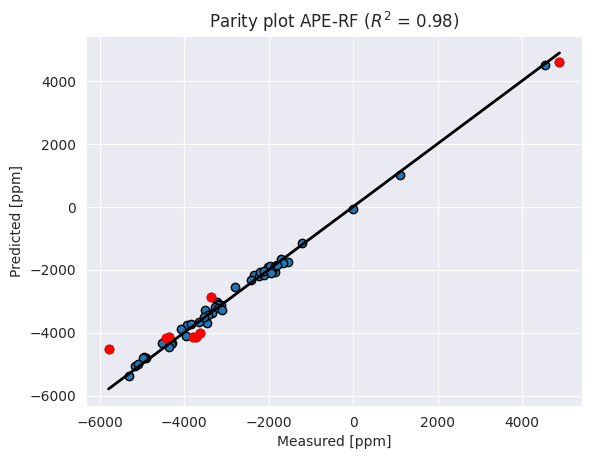

Empirical coverage of model for holdout set: 0.9492
Errors on holdout test set (Backend: sklearn): 
-----------------------------------------
MAE: 155.49259297065245 [ppm]
RMSE: 237.3982578886839 [ppm]
-----------------------------------------
[150.50160158 153.82065191 149.48719219 158.82431461 157.74169101
 158.10948015 165.22223772 156.5565344  197.06984614 163.9075754
 162.50763317 163.93845994 167.76212783 161.88540314 182.32021401
 228.4082274  154.78924879 251.8827504  228.87802935 192.38382477
 164.21347852 160.89693744 172.70895343 181.92151712 174.47489897
 189.55992142 190.79893562 169.66118884 151.55443179 153.25643064
 164.97208556 160.95096677 151.35732265 153.56285655 275.42664457
 159.95793083 153.27303655 148.02876553 227.90172383 147.74233645
 155.47086138 154.66174578 346.05584001 224.2971934  191.52091342
 176.71249893 157.14751611 169.90338469 156.68319793 185.28435857
 207.59683116 191.56788568 218.68095723 204.50150993 178.73410001
 180.18908282 152.19792869 151.

In [3]:
# Uncertainty analysis of APE-RF

import numpy as np
from NMR_predict import GPR_NMR

XYZ_directory = ['/home/alex/Pt_NMR/data/structures/train_split/',
                 '/home/alex/Pt_NMR/data/structures/test_split/']

APE_RF_directory = ['/home/alex/Pt_NMR/data/representations/APE_RF/train/',
                  '/home/alex/Pt_NMR/data/representations/APE_RF/test/']

target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_train.csv',
               '/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_test.csv']

# Define list of AE_RF params [r_cut, dim]
params = [3.0, 500]

# Create instance of GPR_NMR class
pt_gpr = GPR_NMR(descriptor_path=APE_RF_directory, descriptor_type='APE-RF',
                 descriptor_params=params, central_atom='Pt', mode ='write',
                 xyz_path=XYZ_directory, xyz_base='st_', target_path=target_path)

# Use predict function for GPR and obtaining CV prediction errors
errors_std = pt_gpr.GPR_train(kernel_degree=2, noise=0.001, noise_estim=True, lc=False)
print(errors_std)

uncertainties = pt_gpr.GPR_test(kernel_degree=2, noise=0.001, noise_estim=True, parity_plot=True, ecp=True)[3]

print(uncertainties)
print(np.mean(uncertainties))

np.savetxt('/home/alex/Desktop/APE_RF_uncertainties.txt', uncertainties)


/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)



 Optimized noise (on whole train set): 0.013807555790126918
Optimized kernel bias: 1.5197595600747464
Log marginal likelihood: 104.13390005344343 

Outliers (21):
------------
Compound Name: trans-Pt(4-picoline)Cl2, Observed: -1948, Predicted: -2302.569671007069, Residual: -354.5696710070688
Compound Name: trans-Pt(py)2Cl2, Observed: -2008, Predicted: -2302.569671007069, Residual: -294.5696710070688
Compound Name: cis-Pt(3-picoline)Cl2, Observed: -1948, Predicted: -2302.569671007069, Residual: -354.5696710070688
Compound Name: trans-Pt(4-picoline)Cl2, Observed: -3928, Predicted: -4213.394888279321, Residual: -285.3948882793211
Compound Name: trans-Pt(py)2Cl2, Observed: -3641, Predicted: -3367.372935648531, Residual: 273.627064351469
Compound Name: [Pt(SbMe3)Br3]-, Observed: -3780, Predicted: -4088.934569317884, Residual: -308.93456931788387
Compound Name: [Pt(SOMe2)Br3]-, Observed: -5789, Predicted: -4639.391748869327, Residual: 1149.6082511306731
Compound Name: trans-[Pt(AsMe3)Cl2], 

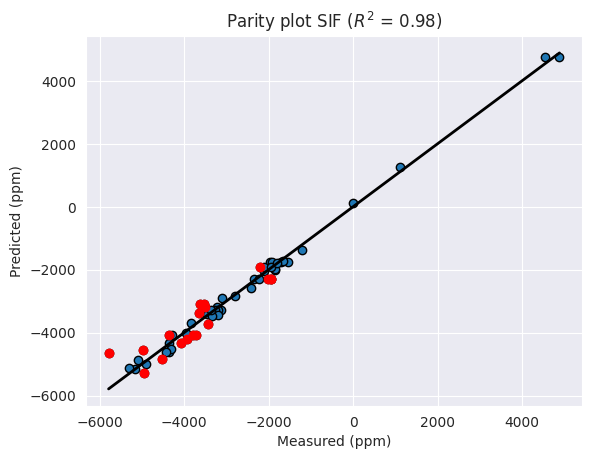

Errors on holdout test set (Backend: sklearn): 
-----------------------------------------
MAE: 200.19889905018826 [ppm]
RMSE: 263.84220210406784 [ppm]
-----------------------------------------
[225.3257583  225.3257583  227.85873087 225.3257583  225.3257583
 225.3257583  226.77059589 227.35101256 225.89180617 229.96895991
 229.96895991 229.96895991 229.96895991 226.50306737 314.99783581
 229.29809284 227.35519298 226.20459064 231.76592152 226.20459064
 231.39413994 224.55153578 226.50306737 229.63116074 236.94244569
 239.87781014 239.2981641  227.5434235  226.58955198 227.6396093
 234.92297104 229.65970292 232.79407431 240.25472684 232.87583034
 245.70835617 228.21396461 226.81978641 229.96895991 226.50306737
 226.50306737 228.77457077 228.77457077 226.20459064 226.20459064
 230.61460922 242.32436198 240.74483193 232.98504852 241.34162854
 241.34162853 241.28689146 240.57532772 240.57532771 244.65220777
 254.77981257 229.27682112 232.02335856 234.69084165]
233.1876695662164


In [1]:
# uncertainty analysis SIF

from NMR_predict import GPR_NMR
import numpy as np

XYZ_directory = ['/home/alex/Pt_NMR/data/structures/train_split/',
                 '/home/alex/Pt_NMR/data/structures/test_split/']

SIF_directory = ['/home/alex/Pt_NMR/data/representations/SIF/train/',
                  '/home/alex/Pt_NMR/data/representations/SIF/test/']

target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_train.csv',
               '/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_test.csv']

# Define list of params (names of structure-independent features to include in this case)
params = ['pauling_EN', 'nuclear_charge', 'atomic_radius', 'valency', 'qmol']

# Create instance of GPR_NMR class for training (CV) and testing on holdout
pt_gpr = GPR_NMR(descriptor_path=SIF_directory, descriptor_type='SIF',
                 descriptor_params=params, central_atom='Pt', mode ='write',
                 xyz_path=XYZ_directory, xyz_base='st_', target_path=target_path)

# Call GPR_train function to obtain cross-validated errors on training set
# Create learning curve and estimate data noise for reliable uncertainties
errors_std = pt_gpr.GPR_train(kernel_degree=2, noise=0.1, noise_estim=True, lc=False)

uncertainties = pt_gpr.GPR_test(kernel_degree=2, noise=0.1, noise_estim=True, parity_plot=True, ecp=False)[3]



print(uncertainties)
print(np.mean(uncertainties))
np.savetxt('/home/alex/Desktop/SIF_uncertainties.txt', uncertainties)

# Rescaling atomic properties

In [2]:
import json
import numpy as np

# Load original data
with open("atomic_props.json", "r") as f:
    atomic_props = json.load(f)

elements = list(atomic_props.keys())

# Extract raw data
EN = np.array([atomic_props[el]["pauling_EN"] for el in elements])
AR = np.array([atomic_props[el]["atomic_radius"] for el in elements])
NC = np.array([atomic_props[el]["nuclear_charge"] for el in elements])

# Linear scaling to [0.1, 1.0]
def linear_scale(x, new_min=0.1, new_max=1.0):
    x_min, x_max = x.min(), x.max()
    return new_min + (x - x_min) * (new_max - new_min) / (x_max - x_min)

# Log transform + linear scale to [0.1, 1.0]
def log_linear_scale(x, new_min=0.1, new_max=1.0):
    x_log = np.log(x)
    return linear_scale(x_log, new_min, new_max)

# Apply transforms
EN_scaled = linear_scale(EN)
AR_scaled = linear_scale(AR)
NC_scaled = linear_scale(NC)

# Repackage
scaled_props = {}
for i, el in enumerate(elements):
    scaled_props[el] = {
        "pauling_EN_scaled": float(EN_scaled[i]),
        "atomic_radius_scaled": float(AR_scaled[i]),
        "nuclear_charge_scaled": float(NC_scaled[i])
    }

# Save to new file
with open("atomic_props_scaled.json", "w") as f:
    json.dump(scaled_props, f, indent=4)

print("Safely scaled atomic properties saved to 'atomic_props_scaled.json'")


Safely scaled atomic properties saved to 'atomic_props_scaled.json'


# Benchmark analysis

In [ ]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/home/alex/Downloads/no_corr_122_cm_dataset.csv',dtype={'Complex ID': 'str'})

y = df['Shift']
X = df['Complex ID']

qmol_list = df['Charge']
qmol_list_new = [qmol / 1000 for qmol in qmol_list]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_shifts = pd.DataFrame({'Experimental' : y_train,
                             'Index' : X_train})

test_shifts = pd.DataFrame({'Experimental' : y_test,
                             'Index' : X_test})

train_shifts.to_csv('/home/alex/Pt_NMR/paper/benchmark/labels/train/train_shifts.csv')
test_shifts.to_csv('/home/alex/Pt_NMR/paper/benchmark/labels/test/test_shifts.csv')

structure_database_git_path = '/home/alex/ML/database_git/Prediction-of-Pt-NMR-chem-shifts/Structures/'

subdir_xtb_xyz = '/iso1/XTB2/opt.xyz'

#for index, qmol in zip(X, qmol_list_new):

#    with open(f'{structure_database_git_path}{index}{subdir_xtb_xyz}', 'r') as f:
#        lines = f.readlines()
        # Update the second line
#        lines[1] = f"{qmol}\n"

#    with open(f'{structure_database_git_path}{index}{subdir_xtb_xyz}', 'w') as f:
#        f.writelines(lines)

#for index in X_test:
#    xyz_source = f'{structure_database_git_path}{index}{subdir_xtb_xyz}'
#    xyz_target = f'/home/alex/Pt_NMR/paper/benchmark/structures/test/st_{index}.xyz'
#    shutil.copy(xyz_source, xyz_target)

In [1]:
# Benchmark SIF

from NMR_predict import GPR_NMR


params_bm = ['pauling_EN', 'nuclear_charge', 'atomic_radius', 'valency', 'qmol']

descriptor_path_bm = ['/home/alex/Pt_NMR/paper/benchmark/representations/SIF/train/',
            '/home/alex/Pt_NMR/paper/benchmark/representations/SIF/test/']

xyz_path_bm = ['/home/alex/Pt_NMR/paper/benchmark/structures/train/',
            '/home/alex/Pt_NMR/paper/benchmark/structures/test/']

target_path_bm = ['/home/alex/Pt_NMR/paper/benchmark/labels/train/train_shifts.csv',
            '/home/alex/Pt_NMR/paper/benchmark/labels/test/test_shifts.csv']

pt_gpr = GPR_NMR(descriptor_path=descriptor_path_bm, descriptor_type='SIF',
                 descriptor_params=params_bm, central_atom='Pt', mode ='write',
                 xyz_path=xyz_path_bm, xyz_base='st_', target_path=target_path_bm)

Error encountered while reading compound names. 
 'Name'
Proceeding.


/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)



 Optimized noise (on whole train set): 0.002673953118302247
Optimized kernel bias: 5.189356711337509
Log marginal likelihood: 71.73447616594686 



/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as 

[15 30 46 61 77] [15.69160899 39.77111581 54.42904152 66.51715509 67.63428831] [673.95569663 221.05448878 148.73667504 150.97793602 144.66332461]
Train/Test Score differences: 
 -----------------------------------------
[658.2640876372614, 181.28337296965648, 94.30763352375776, 84.46078092829882, 77.02903629437542]


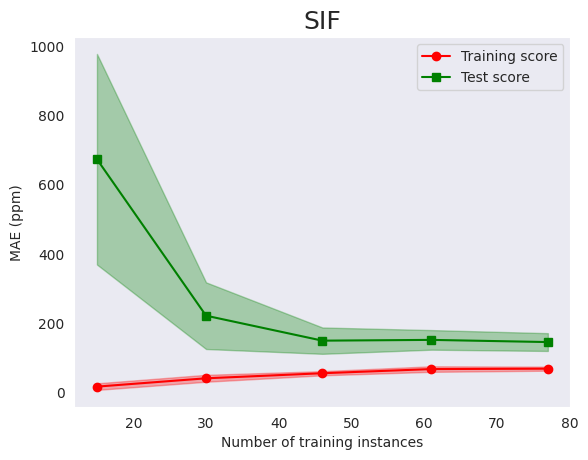

CV errors and stdev on training set (Backend: sklearn):
[101.6   20.72 144.7   42.18   0.  ] 

Error encountered while reading compound names. 
 'Name'
Proceeding.
Error encountered while reading compound names. 
 'Name'
Proceeding.
Errors on holdout test set (Backend: sklearn): 
-----------------------------------------
MAE: 106.26251172070239 [ppm]
RMSE: 147.12034011116162 [ppm]
-----------------------------------------


In [2]:
import numpy as np

errors_std = pt_gpr.GPR_train(kernel_degree=2, noise=0.1, noise_estim=True, lc=True)

print('CV errors and stdev on training set (Backend: sklearn):')
print(np.round(errors_std, 2), '\n')

# Call GPR_test function to obtain mean error on holdout test set
# Create parity plot and compute empirical coverage probability
test_errors = pt_gpr.GPR_test(kernel_degree=2, noise=0.1, noise_estim=True, parity_plot=False, ecp=False)

In [1]:
# Benchmark APE-RF

from NMR_predict import GPR_NMR


params_bm = [2.0, 2500]

descriptor_path_bm = ['/home/alex/Pt_NMR/paper/benchmark/representations/APE_RF/train/',
            '/home/alex/Pt_NMR/paper/benchmark/representations/APE_RF/test/']

xyz_path_bm = ['/home/alex/Pt_NMR/paper/benchmark/structures/train/',
            '/home/alex/Pt_NMR/paper/benchmark/structures/test/']

target_path_bm = ['/home/alex/Pt_NMR/paper/benchmark/labels/train/train_shifts.csv',
            '/home/alex/Pt_NMR/paper/benchmark/labels/test/test_shifts.csv']

pt_gpr = GPR_NMR(descriptor_path=descriptor_path_bm, descriptor_type='APE-RF',
                 descriptor_params=params_bm, central_atom='Pt', mode ='write',
                 xyz_path=xyz_path_bm, xyz_base='st_', target_path=target_path_bm)

In [2]:
import numpy as np

errors_std = pt_gpr.GPR_train(kernel_degree=2, noise=0.001, noise_estim=True, lc=False)

print('CV errors and stdev on training set (Backend: sklearn):')
print(np.round(errors_std, 2), '\n')

# Call GPR_test function to obtain mean error on holdout test set
# Create parity plot and compute empirical coverage probability
test_errors = pt_gpr.GPR_test(kernel_degree=2, noise=0.001, noise_estim=True, parity_plot=False, ecp=False)

Error encountered while reading compound names. 
 No key 'Name' in target data.
Proceeding.

 Optimized noise (on whole train set): 0.0025417881212785884
Optimized kernel bias: 1.542365227718955
Log marginal likelihood: -26.204751640568773 



/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as 

CV errors and stdev on training set (Backend: sklearn):
[152.55  35.42 213.67  82.64   0.  ] 

Error encountered while reading compound names. 
 No key 'Name' in target data.
Proceeding.
Error encountered while reading compound names. 
 No key 'Name' in target data.
Proceeding.
Errors on holdout test set (Backend: sklearn): 
-----------------------------------------
MAE: 161.34378054240798 [ppm]
RMSE: 240.16726111248417 [ppm]
-----------------------------------------


In [3]:
# Benchmark SOAP

from NMR_predict import GPR_NMR


params_bm = [2.0, 2, 5]

descriptor_path_bm = ['/home/alex/Pt_NMR/paper/benchmark/representations/SOAP/train/',
            '/home/alex/Pt_NMR/paper/benchmark/representations/SOAP/test/']

xyz_path_bm = ['/home/alex/Pt_NMR/paper/benchmark/structures/train/',
            '/home/alex/Pt_NMR/paper/benchmark/structures/test/']

target_path_bm = ['/home/alex/Pt_NMR/paper/benchmark/labels/train/train_shifts.csv',
            '/home/alex/Pt_NMR/paper/benchmark/labels/test/test_shifts.csv']

pt_gpr = GPR_NMR(descriptor_path=descriptor_path_bm, descriptor_type='SOAP',
                 descriptor_params=params_bm, central_atom='Pt', mode ='write',
                 xyz_path=xyz_path_bm, xyz_base='st_', target_path=target_path_bm)

In [4]:
import numpy as np

errors_std = pt_gpr.GPR_train(kernel_degree=2, noise=0.001, noise_estim=True, lc=False)

print('CV errors and stdev on training set (Backend: sklearn):')
print(np.round(errors_std, 2), '\n')

# Call GPR_test function to obtain mean error on holdout test set
# Create parity plot and compute empirical coverage probability
test_errors = pt_gpr.GPR_test(kernel_degree=2, noise=0.001, noise_estim=True, parity_plot=False, ecp=False)

Error encountered while reading compound names. 
 No key 'Name' in target data.
Proceeding.

 Optimized noise (on whole train set): 0.0004578157820405303
Optimized kernel bias: 1.2657976574228609
Log marginal likelihood: 93.86787456947962 

CV errors and stdev on training set (Backend: sklearn):
[117.85  38.58 223.3  110.04   0.  ] 

Error encountered while reading compound names. 
 No key 'Name' in target data.
Proceeding.
Error encountered while reading compound names. 
 No key 'Name' in target data.
Proceeding.
Errors on holdout test set (Backend: sklearn): 
-----------------------------------------
MAE: 85.09501437591825 [ppm]
RMSE: 148.1093564177438 [ppm]
-----------------------------------------
